In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
cancer = datasets.load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
linear_svm = SVC(kernel='linear', C=1, random_state=42)
rbf_svm = SVC(kernel='rbf', gamma=0.7, random_state=42)

linear_svm.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

print("Linear SVM:")
evaluate_model(linear_svm, X_test, y_test)

print("\nRBF SVM:")

Linear SVM:
[[ 51  12]
 [  5 103]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        63
           1       0.90      0.95      0.92       108

    accuracy                           0.90       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171


RBF SVM:


In [5]:
evaluate_model(rbf_svm, X_test, y_test)

[[ 52  11]
 [  4 104]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.87        63
           1       0.90      0.96      0.93       108

    accuracy                           0.91       171
   macro avg       0.92      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



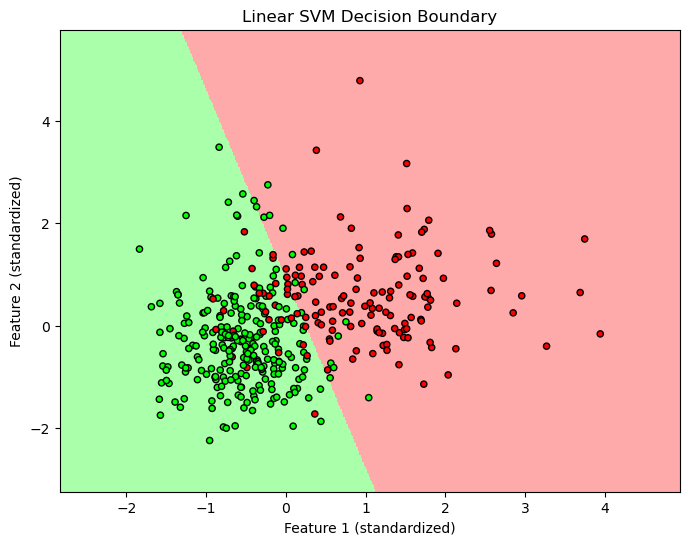

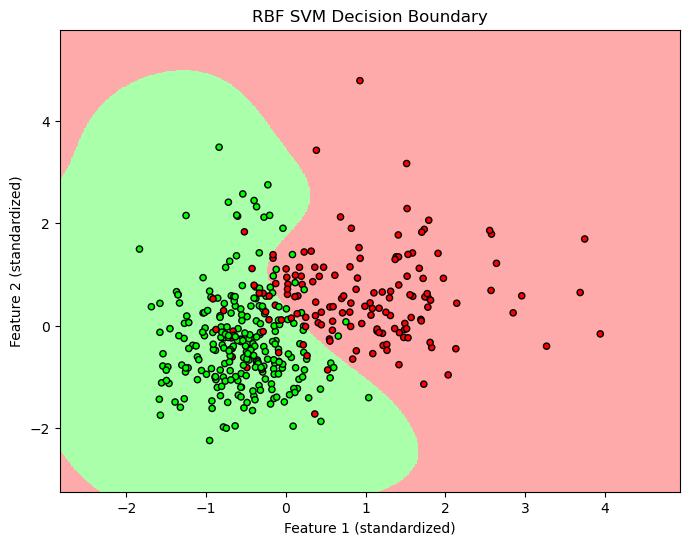

In [6]:
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Feature 1 (standardized)')
    plt.ylabel('Feature 2 (standardized)')
    plt.show()

plot_decision_boundary(linear_svm, X_train, y_train, "Linear SVM Decision Boundary")
plot_decision_boundary(rbf_svm, X_train, y_train, "RBF SVM Decision Boundary")

In [7]:
param_grid = [
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
    {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf']}
]

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5,
                           scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters found:")
print(grid_search.best_params_)
print("\nBest estimator accuracy on test set:")
best_svm = grid_search.best_estimator_
evaluate_model(best_svm, X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

Best estimator accuracy on test set:
[[ 53  10]
 [  6 102]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        63
           1       0.91      0.94      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



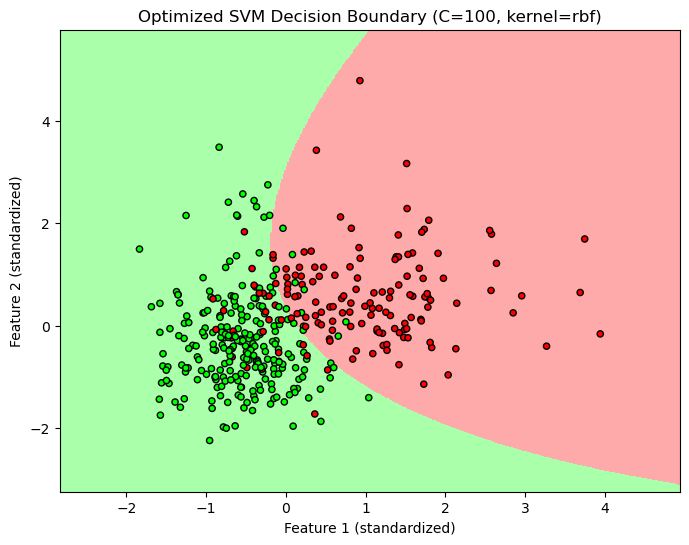

In [8]:
plot_decision_boundary(best_svm, X_train, y_train, 
                       "Optimized SVM Decision Boundary (C={}, kernel={})".format(
                           grid_search.best_params_['C'],
                           grid_search.best_params_['kernel']))